# 4. EDA

## Load Files

In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics.pairwise import cosine_similarity

import pickle

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
with open ('../pickles/df.pkl', 'rb') as pkl:
    df = pickle.load(pkl)

In [3]:
with open ('../pickles/ben_cols.pkl', 'rb') as pkl:
    ben_cols = pickle.load(pkl)
    
with open ('../pickles/ben_cols_dum.pkl', 'rb') as pkl:
    ben_cols_dum = pickle.load(pkl)

In [4]:
with open ('../pickles/rate_cols.pkl', 'rb') as pkl:
    rate_cols = pickle.load(pkl)

## EDA

In [102]:
df.StateCode = df.StateCode.astype('object')

In [103]:
df.head()

,BusinessYear,StateCode,RateEffectiveDate,RateExpirationDate,PlanId,RatingAreaId,Tobacco,Age,IndividualRate,IndividualTobaccoRate,...,Post-cochlear implant aural therapy,X-Rays and Exams - Adult,"Dental Care, Minor - Adult",IsNoticeRequiredForPregnancy,IsReferralRequiredForSpecialist,ChildOnlyOffering,WellnessProgramOffered,DiseaseManagementProgramsOffered,OutOfCountryCoverage,NationalNetwork
0,2016,AK,2016-01-01,2016-12-31,21989AK0030001,Rating Area 1,No Preference,0-20,43.0,NaN,...,0,0,0,NaN,NaN,Allows Adult and Child-Only,NaN,NaN,No,Yes
1,2016,AK,2016-01-01,2016-12-31,21989AK0030001,Rating Area 1,No Preference,21,38.0,NaN,...,0,0,0,NaN,NaN,Allows Adult and Child-Only,NaN,NaN,No,Yes
2,2016,AK,2016-01-01,2016-12-31,21989AK0030001,Rating Area 1,No Preference,22,38.0,NaN,...,0,0,0,NaN,NaN,Allows Adult and Child-Only,NaN,NaN,No,Yes
3,2016,AK,2016-01-01,2016-12-31,21989AK0030001,Rating Area 1,No Preference,23,38.0,NaN,...,0,0,0,NaN,NaN,Allows Adult and Child-Only,NaN,NaN,No,Yes
4,2016,AK,2016-01-01,2016-12-31,21989AK0030001,Rating Area 1,No Preference,24,38.0,NaN,...,0,0,0,NaN,NaN,Allows Adult and Child-Only,NaN,NaN,No,Yes


/Users/namanbhandari/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/namanbhandari/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0.5, 1.0, 'Distribution of Monthly Premiums')

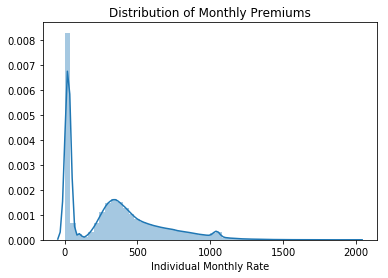

In [104]:
sns.distplot(df[df['IndividualRate'] <= 2000]['IndividualRate'], 
             axlabel='Individual Monthly Rate').set_title('Distribution of Monthly Premiums')

/Users/namanbhandari/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0.5, 1.0, 'Distribution of Monthly Premiums')

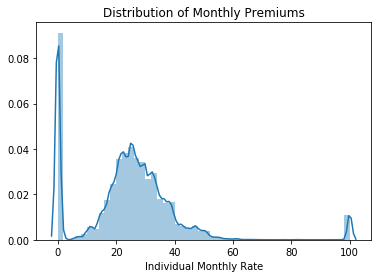

In [105]:
sns.distplot(df[df['IndividualRate'] <= 100]['IndividualRate'], 
             axlabel='Individual Monthly Rate').set_title('Distribution of Monthly Premiums')

/Users/namanbhandari/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0.5, 1.0, 'Distribution of Monthly Premiums')

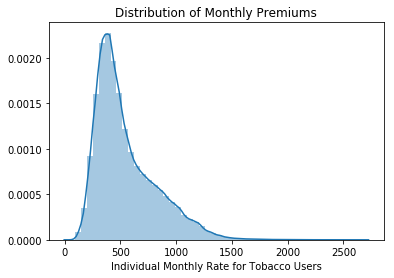

In [106]:
sns.distplot(df['IndividualTobaccoRate'].dropna(), 
             kde=True,
             axlabel='Individual Monthly Rate for Tobacco Users').set_title('Distribution of Monthly Premiums')

In [108]:
num_plans = df['StateCode'].value_counts()

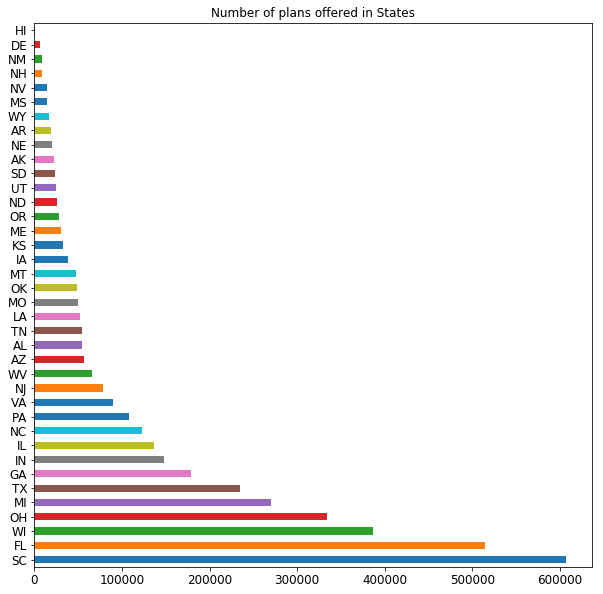

In [109]:
num_plans.plot(kind='barh', 
           figsize=(10,10), 
           title='Number of plans offered in States', 
           fontsize=12)

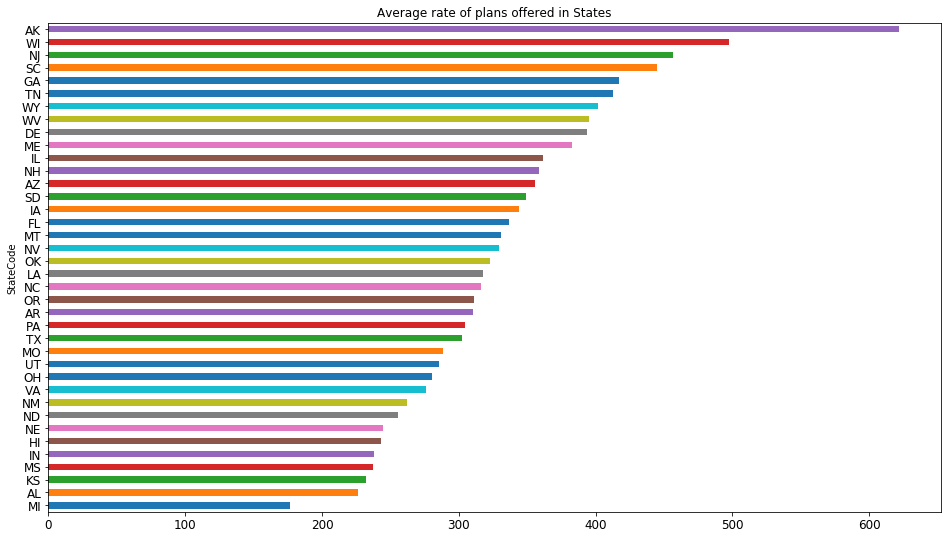

In [116]:
avg_rate_plans = df.groupby('StateCode')['IndividualRate'].mean()
avg_rate_plans = avg_rate_plans.sort_values()
avg_rate_plans.plot(kind='barh', 
           figsize=(16,9), 
           title='Average rate of plans offered in States', 
           fontsize=12)